**Name: Prashant Singh**

**Enrollnment Number: SAU/CS/Mtech/(CS)/2024/04**

**Assignment-2**

**Questions:**

**Question 1**:
Write a function for PCA. The function should take data, the percent-
age of variance to retain as inputs, and should return the data in the
reduced space.


**Question 2**:
In the Iris dataset, choose the first 2 features, i.e. sepal length and sepal width.

a) Run your code on this Iris dataset and retain the first two PCs.

b) Plot the data points in the original space. Further, plot the principal
components in the original space and show the transformed data.

**Question 3:**

a) Compute the percentage of variance captured by the PCs in question2.

b) Calculate the Minimum Squared Error when retaining only the first
PC.


# DataLoading

# **About Iris Flower Dataset:**


*   Iris Flower Dataset Contains 4 features i.e. Sepal Length, Sepal Width, Petal Length and Petal Width
*   It has one target variable Species which is Variety containing 3 classes of 50 data each.



In [ ]:
!wget https://gist.githubusercontent.com/netj/8836201/raw/iris.csv

--2024-09-09 14:01:09--  https://gist.githubusercontent.com/netj/8836201/raw/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3975 (3.9K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.88K  --.-KB/s    in 0s      

2024-09-09 14:01:10 (48.4 MB/s) - ‘iris.csv’ saved [3975/3975]



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


datasetV=pd.read_csv('iris.csv')


data=np.genfromtxt('iris.csv',delimiter=',',skip_header=1)
dataI = data[:,:-1]
print(datasetV)



     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [ ]:
datasetV.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [ ]:
datasetV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As we can see Our Target variable is Variety and we have 4 features.

In [ ]:
datasetV.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


As we can see scale of the features are large and PCA is sensetive to scale of data i.e. PCA uses variance, co-variance etc. so data with larger scale may dominate the principal components. So Data Standardization Should be done.

# Data Standardization



*   Function data_standard will take dataset and will return standardize data.
*   Standardization of data will be done by first centralizing the data and then dividing it by standard deviation of the data to standardize it, now all features are on similar scale.






In [ ]:
def data_standard(data):
  print(f"Part of Data before Standardization:{data[:10,:]}")
  print(f"Size of Data before standardization:{data.shape}")
  mean=np.mean(data)
  print(f"The Mean of Old Data:{mean:.2f}")

  standard_dev=np.std(data)
  print(f"The Standard Deviation of Old Data:{standard_dev:.2f}")

  standard_data  = (data - mean )/standard_dev

  print(f"Part of Data After Standardization:{standard_data[:10,:]}")
  print(f"Size of Data After standardization:{standard_data.shape}")
  new_mean=np.mean(standard_data)
  print(f"Mean of Data After Standardization:{new_mean:.2f}")

  new_std=np.std(standard_data)
  print(f"Standard Deviation of Data After Standardization:{new_std:.2f}")

  return standard_data

st_data=data_standard(dataI)

Part of Data before Standardization:[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Size of Data before standardization:(150, 4)
The Mean of Old Data:3.46
The Standard Deviation of Old Data:1.97
Part of Data After Standardization:[[ 0.82858665  0.01798522 -1.04592915 -1.65388022]
 [ 0.72726147 -0.23532773 -1.04592915 -1.65388022]
 [ 0.62593629 -0.13400255 -1.09659174 -1.65388022]
 [ 0.5752737  -0.18466514 -0.99526657 -1.65388022]
 [ 0.77792406  0.06864781 -1.04592915 -1.65388022]
 [ 0.98057441  0.22063558 -0.89394139 -1.55255505]
 [ 0.5752737  -0.03267737 -1.04592915 -1.60321764]
 [ 0.77792406 -0.03267737 -0.99526657 -1.65388022]
 [ 0.47394852 -0.28599032 -1.04592915 -1.65388022]
 [ 0.72726147 -0.18466514 -0.99526657 -1.70454281]]
Size of Data After standardization:(150, 4)
Mean of Data After Standardization:0.00
Standard Deviation of Data After

# **Question-1**

# **PCA Function**



*   Function PCA will take parameters i.e. Standardize Data and Variance to retain as input and will return reduced data, principal_components,sorted_eigenvalue.
*  Standardize data will be passed to np.cov which will find covariance  matrix of the data.

*   Eigen Values, Eigen Vectors will be passed to np.linalg.eigh which will return eigen values and vectors, which will be then reverse sorted.
*   Based on Variance to retain it will give two eigen vectors and those will be our first n principal components.


*   Then the retain eigen vector will be projected on the standardize data and that will be the reduced space.








In [ ]:

def PCA(data,var_toretain):

  cov_matrix = np.cov(data, rowvar=False)

  print(f"Covariance Matrix of the standardize data:{cov_matrix}")
  print(f"Size of Covariance Matrix of the standardize data:{cov_matrix.shape}")

  eigen_val, eigen_vec=np.linalg.eigh(cov_matrix)
  print(f"Eigen Values of the Covariance Matrix:{eigen_val}")
  print(f"Corresponding Eigen Vectors of the Covariance Matrix:{eigen_vec}")

  index = np.argsort(eigen_val)[::-1]
  sorted_eigenval,sorted_eigenvec=eigen_val[index],eigen_vec[:,index]
  print(f"Eigen Values in Decreasing Order:{sorted_eigenval}")
  print(f"Eigen Vectors in corresponding to decreasing eigen values:{sorted_eigenvec}")
  print(f"Size of Eigen Vectors{sorted_eigenvec.shape}")

  variance_explained = np.cumsum(sorted_eigenval) / np.sum(sorted_eigenval)
  num_components = np.argmax(variance_explained >= var_toretain) + 1

  principal_components=sorted_eigenvec[:num_components]
  print(f"Principal components retained are:{principal_components}")
  print(f"Size of Principal Components{principal_components.shape}")

  reduced_data=np.matmul(principal_components,data.T)
  print(f"Size of Reduced Data:{reduced_data.shape}")

  return reduced_data, principal_components, sorted_eigenval


In [ ]:
DataReduced, pc1, eg2=PCA(st_data, .95)


Covariance Matrix of the standardize data:[[ 1.6382002  -0.26116567  0.50748465 -1.25982452]
 [-0.26116567  0.09159949 -0.11549161  0.20709426]
 [ 0.50748465 -0.11549161  0.8221129   0.1607577 ]
 [-1.25982452  0.20709426  0.1607577   1.47493306]]
Size of Covariance Matrix of the standardize data:(4, 4)
Eigen Values of the Covariance Matrix:[0.00749193 0.05459503 1.06841931 2.89633936]
Corresponding Eigen Vectors of the Covariance Matrix:[[ 0.50053745 -0.38551326  0.24756737 -0.73454216]
 [-0.46192562 -0.87587355 -0.06728047  0.12224396]
 [-0.48546971  0.17205728  0.84631767 -0.13587442]
 [ 0.54809319 -0.23371211  0.46682988  0.65348479]]
Eigen Values in Decreasing Order:[2.89633936 1.06841931 0.05459503 0.00749193]
Eigen Vectors in corresponding to decreasing eigen values:[[-0.73454216  0.24756737 -0.38551326  0.50053745]
 [ 0.12224396 -0.06728047 -0.87587355 -0.46192562]
 [-0.13587442  0.84631767  0.17205728 -0.48546971]
 [ 0.65348479  0.46682988 -0.23371211  0.54809319]]
Size of Eige

Plotting the transformed Space using PC-1 and PC-2

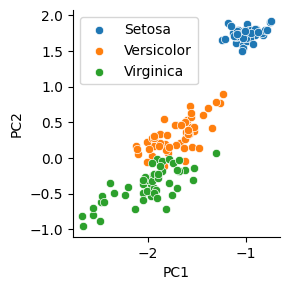

In [ ]:
target=datasetV['variety']

Transformed_data = np.vstack((DataReduced , target)).T


df = pd.DataFrame(Transformed_data, columns=['PC1' , "PC2" , "labels"])

sns.FacetGrid(data = df , hue="labels" ).map(sns.scatterplot , "PC1" , "PC2")
plt.legend()
plt.show()

# Question-2

2(a)

In [ ]:
#Slicing last two features from Iris dataset
new_data=data[:,:-3]
print(f"Part of Iris Dataset with First 2 features:{new_data[:10,:]}")


Part of Iris Dataset with First 2 features:[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]


Passing the Sliced dataset to PCA function.


*   First the dataset is passed to function data_standard which will standardize it.
*   Then the standardize data will be passed to PCA function, which will retain the 1st two PC's.



In [ ]:
st1=data_standard(new_data)
#Calling PCA function
DataSetReduced, pri_comp, sorted_eigenVal=PCA(st1,.95)



Part of Data before Standardization:[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
Size of Data before standardization:(150, 2)
The Mean of Old Data:4.45
The Standard Deviation of Old Data:1.54
Part of Data After Standardization:[[ 0.42152687 -0.61661011]
 [ 0.29175975 -0.94102792]
 [ 0.16199263 -0.8112608 ]
 [ 0.09710906 -0.87614436]
 [ 0.35664331 -0.55172655]
 [ 0.61617756 -0.35707587]
 [ 0.09710906 -0.68149368]
 [ 0.35664331 -0.68149368]
 [-0.03265806 -1.00591148]
 [ 0.29175975 -0.87614436]]
Size of Data After standardization:(150, 2)
Mean of Data After Standardization:-0.00
Standard Deviation of Data After Standardization:1.00
Covariance Matrix of the standardize data:[[ 0.2886685  -0.01786419]
 [-0.01786419  0.07997899]]
Size of Covariance Matrix of the standardize data:(2, 2)
Eigen Values of the Covariance Matrix:[0.07846083 0.29018667]
Corresponding Eigen Vectors of the Covariance Matrix:[[-0.08467831 -0.99640834]
 

# Question-2(b)

Plotting the data in the original Space.

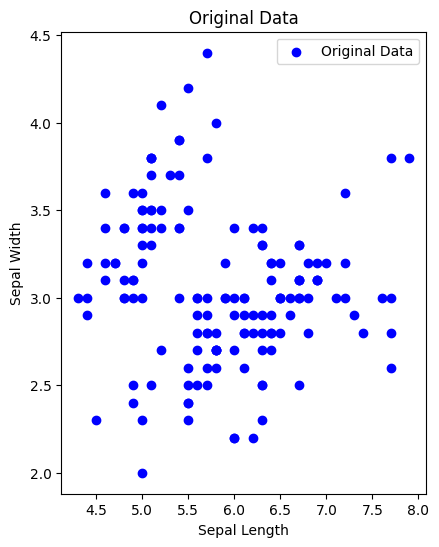

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

Plotting the first two PC's in the original Space.

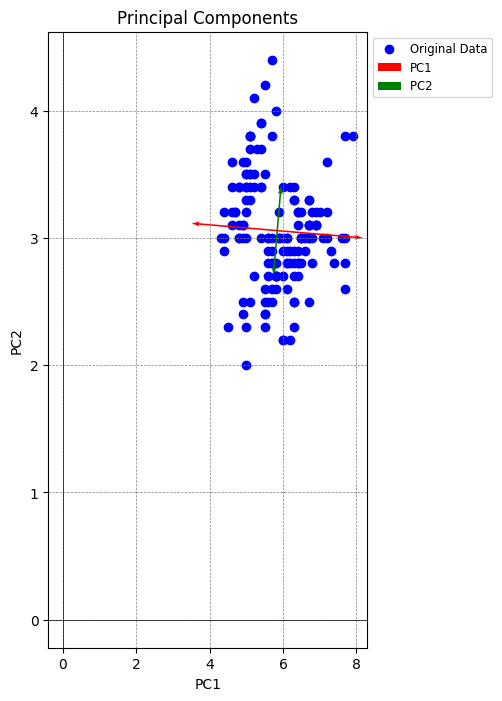

In [ ]:
plt.figure(figsize=(14, 8))
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], c='blue', label='Original Data')
mean = np.mean(data, axis=0)

origin = mean[:2]  # Origin is the mean of the data for the first 2 features
pc1 = pri_comp[:, 0] * np.sqrt(sorted_eigenVal[0])
pc2 = pri_comp[:, 1] * np.sqrt(sorted_eigenVal[1])

plt.quiver(origin[0], origin[1], pc1[0], pc1[1], color='r', scale=2, label="PC1", width=0.005)
plt.quiver(origin[0], origin[1], -pc1[0], -pc1[1], color='r', scale=2, label="", width=0.005)
plt.quiver(origin[0], origin[1], pc2[0], pc2[1], color='g', scale=2, label="", width=0.005)
plt.quiver(origin[0], origin[1], -pc2[0], -pc2[1], color='g', scale=2, label="PC2 ", width=0.005)

plt.title('Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.show()

Plotting the data in transformed space with the first 2 PC's.

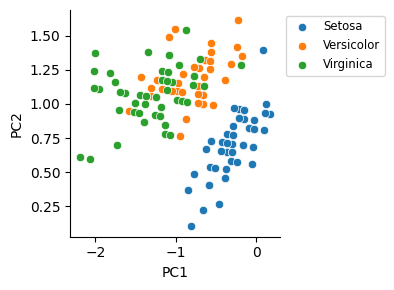

In [ ]:
#Adding the Label Columns to the transformed data
Transformed_data1 = np.vstack((DataSetReduced, target)).T

df = pd.DataFrame(Transformed_data1, columns=['PC1' , "PC2" , "labels"])

sns.FacetGrid(data = df , hue="labels" ).map(sns.scatterplot , "PC1" , "PC2")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.show()

# Question-3

Question-3(a)



*   The function percentage_var will be take Sorted Eigen Values as input and will return percentage of variance captured.
*   Percentage variance is calculated by Ratio of Eigen Value to total Variance.



In [ ]:
def percentage_var(EigenVal):
  percentage_variance=(EigenVal/(np.sum(EigenVal)))*100
  print(f"Percentage Variance Captured by the PC's are:{percentage_variance}")
  return percentage_variance
#Calling the function percentage_var
percentage_variance=percentage_var(sorted_eigenVal)


Percentage Variance Captured by the PC's are:[78.71657099 21.28342901]


Question-3(b)



*   The Function MSE will take Sorted Eigen Values and Data as input and will return the minimum Squared Error


*   The minimum Squared error calculated here is when only retaining the 1st PC.


*   Minimimum Squared Error is calculated here by the formula:
MSE=1/n(i=1 to n∑​λi​−λ1​)



In [ ]:
def MSE(EigenVal, data):
    minmsqu_error=(np.sum(EigenVal)-EigenVal[0])/data.shape[0]
    print(f"Minimum Squared Error when only retaining the 1st PC is:{minmsqu_error:.4f}")
    return minmsqu_error
#Calling the function MSE
minimum_squared_error=MSE(sorted_eigenVal, new_data)

Minimum Squared Error when only retaining the 1st PC is:0.0005
